# Comparação entre o modelo MTL com o uso de embeddings HGI e HMMR


**Configurações usadas**

### **InputsConfig**  
- **EMBEDDING_DIM**: 64  
- **SLIDE_WINDOW**: 9  
- **PAD_VALUE**: 0  
- **TIMEOUT_TEST**: None  
- **NEXT_TARGET**: None  
- **CATEGORY_TARGET**: None  

---

### **MTLModelConfig**  
- **NUM_CLASSES**: 7  
- **BATCH_SIZE**: 2048  
- **EPOCHS**: 50  
- **LEARNING_RATE**: 0.0001  
- **K_FOLDS**: 3  

---

### **ModelParameters**  
- **INPUT_DIM**: 64
- **SHARED_LAYER_SIZE**: 256  
- **NUM_HEADS**: 8  
- **NUM_LAYERS**: 4  
- **SEQ_LENGTH**: 9  
- **NUM_SHARED_LAYERS**: 4  
- **ENCODER_OUTPUT_SIZE**: 256  
- **EXPERT_HIDDEN_SIZE**: 256  
- **EXPERT_OUTPUT_SIZE**: 256  
- **NUM_EXPERTS**: 9  


# HGI

In [ ]:
from google.colab import drive

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/MTL_POI_Novo/PoiMtlNet

/content/drive/MyDrive/MTL_POI_Novo/PoiMtlNet


In [ ]:
import os
os.environ["DATA_ROOT"] = "/content/drive/MyDrive/MTL_POI_Novo/data"
os.environ["RESULTS_ROOT"] = "/content/drive/MyDrive/MTL_POI_Novo/results"



In [ ]:
!pip install numpy

In [ ]:
from configs.paths import DATA_ROOT, RESULTS_ROOT, IO_CHECKINS, OUTPUT_ROOT, TEMP_DIR
print("DATA_ROOT =", DATA_ROOT)
print("RESULTS_ROOT =", RESULTS_ROOT)
print("IO_CHECKINS =", IO_CHECKINS)
print("OUTPUT_ROOT =", OUTPUT_ROOT)
print("TEMP_DIR =", TEMP_DIR)


DATA_ROOT = /content/drive/MyDrive/MTL_POI_Novo/data
RESULTS_ROOT = /content/drive/MyDrive/MTL_POI_Novo/results
IO_CHECKINS = /content/drive/MyDrive/MTL_POI_Novo/data/checkins
OUTPUT_ROOT = /content/drive/MyDrive/MTL_POI_Novo/data/output
TEMP_DIR = /content/drive/MyDrive/MTL_POI_Novo/data/temp


## Treino com novo modelo de embeddings pelo HGI

In [ ]:
!python -m pipelines.create_inputs

Generating sequences for each user...
Users with valid sequences: 200, Total visit sequences: 654
Preparing embeddings...
Generating sequences DataFrame...
Processing users: 100% 200/200 [00:00<00:00, 29576.93it/s]
nextpoi_sequences shape: (654, 11)
Success: nextpoi_sequences saved at /content/drive/MyDrive/MTL_POI_Novo/data/output/montana/pre-processing/poi-sequences.csv

Generating next POI input data...
Resuming from row 654 (found existing file).
Batches: 0it [00:00, ?it/s]
Finished: wrote 654 sequences to /content/drive/MyDrive/MTL_POI_Novo/data/output/montana/pre-processing/next-input.csv
Processing complete!


In [ ]:
!python -m pipelines.mtlnet_trainer

2025-10-06 12:36:40.877264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759754200.924851    8364 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759754200.938659    8364 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759754200.975348    8364 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759754200.975407    8364 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759754200.975417    8364 computation_placer.cc:177] computation placer alr

## Sumário do Treino

### Category

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MTL_POI_Novo/results/montana/mtlnet_lr1.0e-04_bs2048_ep50_20251006_1236/summary/summary_category_metrics_formatted.csv")
df.head()

,Category,precision,recall,f1-score,support
0,Community,64.08 ± 14.18,66.26 ± 8.50,64.53 ± 9.53,3266.67 ± 57.74
1,Entertainment,47.29 ± 18.12,19.37 ± 0.55,26.92 ± 3.10,2066.67 ± 57.74
2,Food,71.58 ± 3.02,76.38 ± 5.53,73.78 ± 2.55,13966.67 ± 57.74
3,Nightlife,57.85 ± 7.62,54.76 ± 5.46,55.84 ± 2.63,2800.00 ± 0.00
4,Outdoors,67.92 ± 9.16,69.19 ± 3.08,68.28 ± 4.81,3133.33 ± 57.74


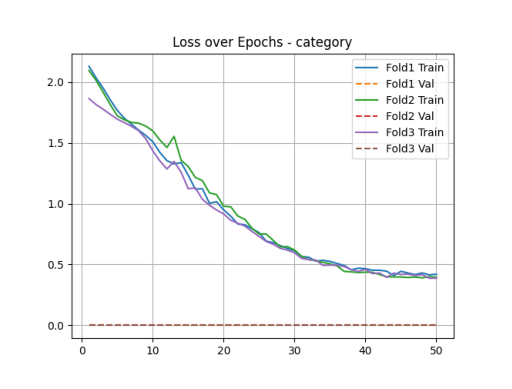

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/drive/MyDrive/MTL_POI_Novo/results/montana/mtlnet_lr1.0e-04_bs2048_ep50_20251006_1236/plots/category/loss.png'

img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

### Next

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MTL_POI_Novo/results/montana/mtlnet_lr1.0e-04_bs2048_ep50_20251006_1236/summary/summary_next_metrics_formatted.csv")
df.head()

,Category,precision,recall,f1-score,support
0,Community,53.78 ± 2.75,75.65 ± 10.08,62.55 ± 2.40,4366.67 ± 57.74
1,Entertainment,18.84 ± 4.09,23.21 ± 9.28,20.62 ± 6.35,733.33 ± 57.74
2,Food,41.92 ± 8.34,12.22 ± 10.84,16.87 ± 13.45,6000.00 ± 0.00
3,Nightlife,34.44 ± 15.03,24.36 ± 8.41,26.27 ± 4.81,1233.33 ± 57.74
4,Outdoors,32.06 ± 7.78,54.03 ± 18.45,39.60 ± 9.67,1533.33 ± 57.74


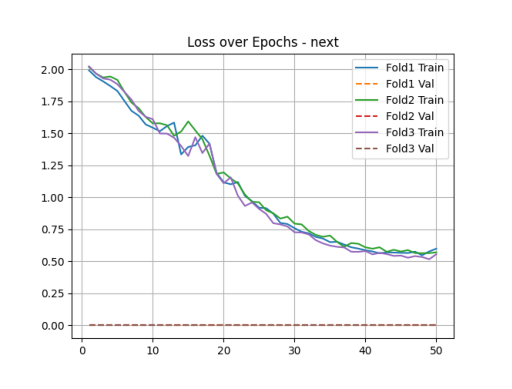

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/drive/MyDrive/MTL_POI_Novo/results/montana/mtlnet_lr1.0e-04_bs2048_ep50_20251006_1236/plots/next/loss.png'

img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

### Geral (Model)

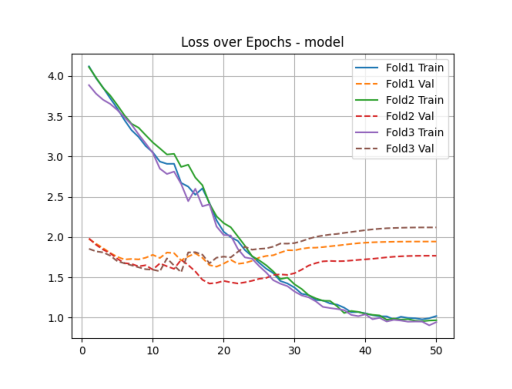

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/drive/MyDrive/MTL_POI_Novo/results/montana/mtlnet_lr1.0e-04_bs2048_ep50_20251006_1236/plots/model/loss.png'

img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

#

In [ ]:
# @title
from google.colab import drive

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# @title
%cd drive/MyDrive/MTL_POI_Novo/PoiMtlNet

/content/drive/MyDrive/MTL_POI_Novo/PoiMtlNet


In [ ]:
# @title
import os
os.environ["DATA_ROOT"] = "/content/drive/MyDrive/MTL_POI_Novo/data"
os.environ["RESULTS_ROOT"] = "/content/drive/MyDrive/MTL_POI_Novo/results"



In [ ]:
# @title
!pip install numpy

In [ ]:
# @title
from configs.paths import DATA_ROOT, RESULTS_ROOT, IO_CHECKINS, OUTPUT_ROOT, TEMP_DIR
print("DATA_ROOT =", DATA_ROOT)
print("RESULTS_ROOT =", RESULTS_ROOT)
print("IO_CHECKINS =", IO_CHECKINS)
print("OUTPUT_ROOT =", OUTPUT_ROOT)
print("TEMP_DIR =", TEMP_DIR)


DATA_ROOT = /content/drive/MyDrive/MTL_POI_Novo/data
RESULTS_ROOT = /content/drive/MyDrive/MTL_POI_Novo/results
IO_CHECKINS = /content/drive/MyDrive/MTL_POI_Novo/data/checkins
OUTPUT_ROOT = /content/drive/MyDrive/MTL_POI_Novo/data/output
TEMP_DIR = /content/drive/MyDrive/MTL_POI_Novo/data/temp


## Treino com novo modelo de embeddings pelo HMRM

In [ ]:
# @title
!python -m src.data.create_embb


Processing Montana check-ins...
Original checkins: (6171, 8)
Renamed 'local_datetime' to 'datetime'
Number of qualified users: 101
Filtered checkins shape: (4720, 8)
Filtered check-ins saved to /content/drive/MyDrive/MTL_POI_Novo/data/output/montana/filtrado.csv
Creating embeddings with weight=0.1, K=7, embedding_size=64
2025-10-06 13:47:27,382 - INFO - Starting HMRM with file: /content/drive/MyDrive/MTL_POI_Novo/data/output/montana/filtrado.csv
2025-10-06 13:47:27,401 - INFO - Factorizing user and place IDs
2025-10-06 13:47:27,401 - INFO - Starting HMRM optimization with K=7, embedding_size=64
2025-10-06 13:47:27,402 - INFO - Starting HMRM optimization with K=7, M=64, l2_weight=0.1
2025-10-06 13:47:27,411 - INFO - Creating frequency matrices...
2025-10-06 13:47:27,413 - INFO - Total places: 1023, total users: 101
Creating user-location matrix:   0% 0/4720 [00:00<?, ?it/s]
Processing timestamps: 100% 4720/4720 [00:00<00:00, 1448428.07it/s]
2025-10-06 13:47:27,457 - INFO - _create_user

In [ ]:
# @title
!python -m pipelines.create_inputs

Generating sequences for each user...
Users with valid sequences: 101, Total visit sequences: 555
Preparing embeddings...
Generating sequences DataFrame...
Processing users: 100% 101/101 [00:00<00:00, 26883.15it/s]
nextpoi_sequences shape: (555, 11)
Success: nextpoi_sequences saved at /content/drive/MyDrive/MTL_POI_Novo/data/output/montana/pre-processing/poi-sequences.csv

Generating next POI input data...
Resuming from row 654 (found existing file).
Batches: 0it [00:00, ?it/s]
Finished: wrote 555 sequences to /content/drive/MyDrive/MTL_POI_Novo/data/output/montana/pre-processing/next-input.csv
Processing complete!


In [ ]:
# @title
!python -m pipelines.mtlnet_trainer

2025-10-06 13:57:37.910362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759759057.935837   28476 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759759057.943684   28476 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759759057.963564   28476 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759759057.963607   28476 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759759057.963613   28476 computation_placer.cc:177] computation placer alr

## Sumário do Treino

### Category

In [ ]:
# @title
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MTL_POI_Novo/results/montana/mtlnet_lr1.0e-04_bs2048_ep50_20251006_1236/summary/summary_category_metrics_formatted.csv")
df.head()

,Category,precision,recall,f1-score,support
0,Community,64.08 ± 14.18,66.26 ± 8.50,64.53 ± 9.53,3266.67 ± 57.74
1,Entertainment,47.29 ± 18.12,19.37 ± 0.55,26.92 ± 3.10,2066.67 ± 57.74
2,Food,71.58 ± 3.02,76.38 ± 5.53,73.78 ± 2.55,13966.67 ± 57.74
3,Nightlife,57.85 ± 7.62,54.76 ± 5.46,55.84 ± 2.63,2800.00 ± 0.00
4,Outdoors,67.92 ± 9.16,69.19 ± 3.08,68.28 ± 4.81,3133.33 ± 57.74


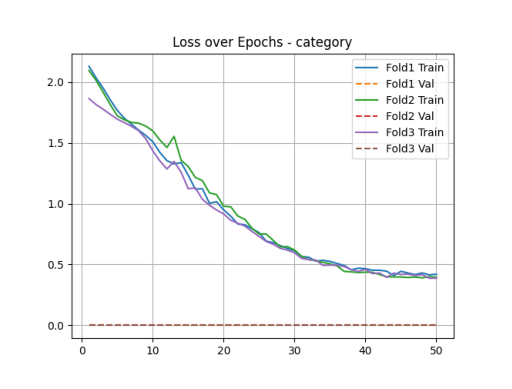

In [ ]:
# @title
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/drive/MyDrive/MTL_POI_Novo/results/montana/mtlnet_lr1.0e-04_bs2048_ep50_20251006_1236/plots/category/loss.png'

img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

### Next

In [ ]:
# @title
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MTL_POI_Novo/results/montana/mtlnet_lr1.0e-04_bs2048_ep50_20251006_1236/summary/summary_next_metrics_formatted.csv")
df.head()

,Category,precision,recall,f1-score,support
0,Community,53.78 ± 2.75,75.65 ± 10.08,62.55 ± 2.40,4366.67 ± 57.74
1,Entertainment,18.84 ± 4.09,23.21 ± 9.28,20.62 ± 6.35,733.33 ± 57.74
2,Food,41.92 ± 8.34,12.22 ± 10.84,16.87 ± 13.45,6000.00 ± 0.00
3,Nightlife,34.44 ± 15.03,24.36 ± 8.41,26.27 ± 4.81,1233.33 ± 57.74
4,Outdoors,32.06 ± 7.78,54.03 ± 18.45,39.60 ± 9.67,1533.33 ± 57.74


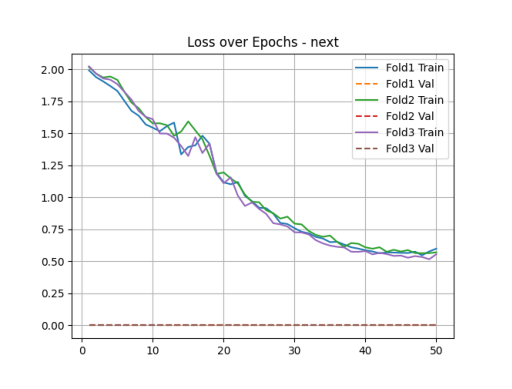

In [ ]:
# @title
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/drive/MyDrive/MTL_POI_Novo/results/montana/mtlnet_lr1.0e-04_bs2048_ep50_20251006_1236/plots/next/loss.png'

img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

### Geral (Model)

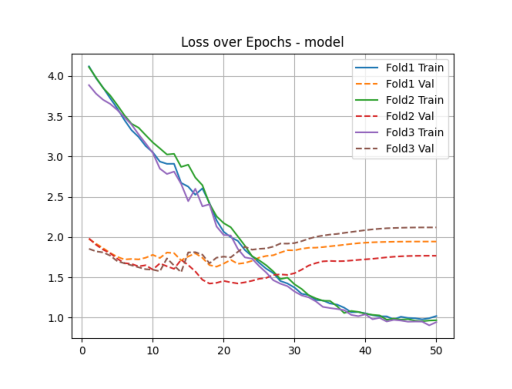

In [ ]:
# @title
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/drive/MyDrive/MTL_POI_Novo/results/montana/mtlnet_lr1.0e-04_bs2048_ep50_20251006_1236/plots/model/loss.png'

img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()